<a href="https://colab.research.google.com/github/BweepBwop/Forensics-Plate-Number-Detection-using-Flask/blob/main/PlateNumberIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [10]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 19.5 MB/s eta 0:00:00


In [11]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import torch

Saving image3.jpg to image3.jpg


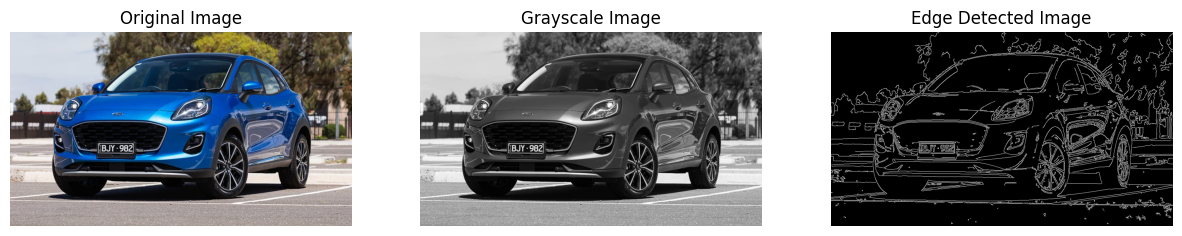

In [39]:
import torch.utils.data as data_utils
from torch.utils.data import Dataset, TensorDataset, DataLoader
from matplotlib import pyplot as plt
import cv2
import glob
from google.colab import files

def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Upload an image
uploaded_image_path = upload_image()

# Load the uploaded image
img = cv2.imread(uploaded_image_path)
if img is not None:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filter for noise reduction
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

    # Perform edge detection using Canny
    edged = cv2.Canny(bfilter, 30, 200)

    # Create a figure to display all three images
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')  # Hide axes

    # Display the grayscale image
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title('Grayscale Image')
    plt.axis('off')  # Hide axes

    # Display the edge-detected image
    plt.subplot(1, 3, 3)
    plt.imshow(edged, cmap='gray')  # Use 'gray' colormap for edge detection
    plt.title('Edge Detected Image')
    plt.axis('off')  # Hide axes

    # Show the images
    plt.show()
else:
    print("Error: Image not found or unable to load.")

# Data loading (if you still want to load images from a directory)
DATA_PATH = 'Samples'
image_files = glob.glob(DATA_PATH + '/*.jpg')

In [40]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [41]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [42]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [43]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

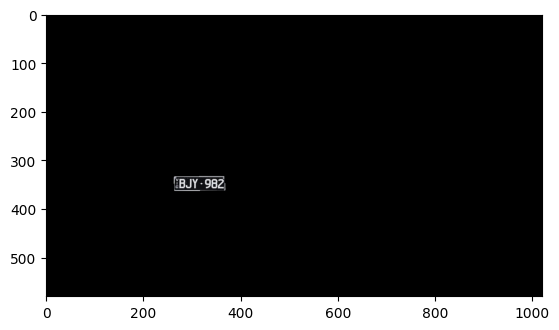

In [44]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [45]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

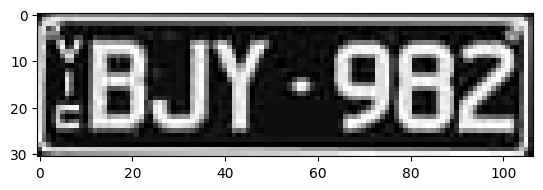

In [46]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [47]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3741937983327902)]

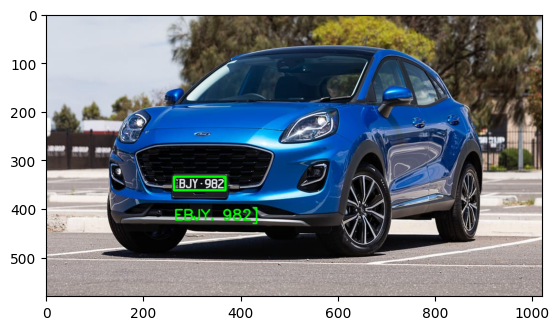

In [48]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))